In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from statsmodels.distributions.empirical_distribution import ECDF
from multiprocessing import Pool

%config InlineBackend.figure_format = 'retina'

def plot_cdf(x, strictly_positive=True, percentile_lb=None, percentile_ub=None, max_points=None, highlight=None, log='x', ax=None, label=None, color=None):
    if ax is None:
        ax = plt.subplots(1, 1)[1]
        
    if strictly_positive:
        x = x[x > 0]

    ecdf = ECDF(x)
    lb, ub = x.min(), x.max()
    
    if percentile_lb is not None:
        lb = np.percentile(x, percentile_lb)
    
    if percentile_ub is not None:
        ub = np.percentile(x, percentile_ub)
    
    x_orig = x
    x = x[(x >= lb) & (x <= ub)]
    if max_points and len(x) > max_points:
        points = np.logspace(np.log(lb), np.log(ub), max_points)
    else:
        points = np.sort(x)
    
    mass = ecdf(points)
    ax.plot(points, mass, label=label, color=color, lw=2)
    
    if highlight:
        hlb, hub = np.percentile(x_orig, highlight)
        idx = (points >= hlb) & (points <= hub)
        ax.fill_between(points[idx], 0, mass[idx], alpha=0.2, color=color)
    
    label=f'median {label}' if label else 'median'
    ax.vlines(np.median(points), 0, mass.max(), lw=1, color=color, alpha=0.5, label=label)
    if 'x' in log:
        ax.semilogx()
    if 'y' in log:
        ax.semilogy()
    sns.despine()


sns.set_palette(sns.color_palette('colorblind'))
current_palette = sns.color_palette()

df = pd.read_csv("data/interaction_set_updated.csv", index_col=0)

# Dunbar's Number is Quadratic
## Or, Inference in Relational Space is Human-Hard

> Ours is a brand new world of allatonceness. "Time" has ceased. "Space" has vanished. We now live in a global village...a simultaneous happening. We are back in acoustic space. We have begun again to structure the primordial feelings, the tribal emotions from which a few centuries of literacy divorced us.
> 
> McLuhan & Fiore. [The Medium is the Massage](https://amzn.to/2LhsAyc) (1967, p. 63)

^[1] xxx

^[1]

Dunbar's number refers to the claim that people can only manage relationships with around n people. (Most commonly, $n$ is a very hand-wavy 150.) It's one of those ideas that made the leap from academia to popular science and then to cocktail parties. Consequently, I cite it, quote it, and talk about it, as well. But, I'm not a big fan of Dunbar's number for a few reasons.

First, either I continue to misunderstand it or most other people do, and I'm pretty sure it's the latter. Managing relationships with n people does not entail "knowing" 150 people in the dyadic sense of having had sufficient experience with them to recall who they are. That's not how human sociality works. Managing relationships with n people means something closer to: you both have some experience with them *and also understand how they socially relate to everyone else*. That is, you know 150 people when you can competently predict how any two of them would interact in paired-off social circumstances without you. In the narrow context of anthropology skewed towards the lower end of socio-complexity, the difference is hard to see. For bands or tribes bound by geography, resource scarcity, and compressive kinship grammars, knowing 150 people and understanding how they relate to one another comes close to meaning the same thing. But as we move towards increased socio-complexity, the distinction becomes critical: Dunbar’s number is a statement about inter-relationship comprehension with upper-bounds quadratic in n, not linear.

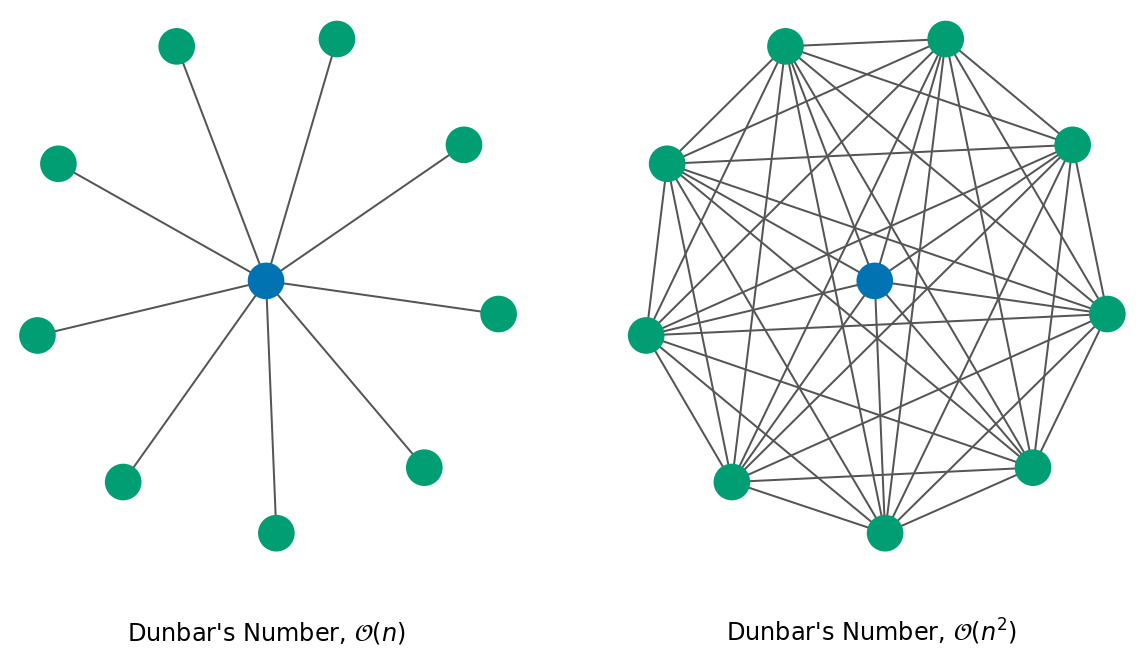

In [8]:
palette = sns.color_palette()
g, h = nx.Graph(), nx.Graph()
c = [palette[0]] + [palette[2]] * 9
n, nc = 10, []

for i in range(1, n):
    g.add_edge(0, i)
    h.add_edge(0, i)
    nc.append('#555')
    
    for j in range(n):
        if i < j:
            h.add_edge(i, j)
            nc.append('#555')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
pos = nx.spring_layout(g, iterations=100)
nx.draw(g, pos=pos, node_color=c, edge_color=nc, ax=axes[0])
nx.draw(h, pos=pos, node_color=c, edge_color=nc, ax=axes[1])
plt.figtext(0.3, 0.01, r"Dunbar's Number, $\mathcal{O}(n)$", 
            ha="center", fontsize=12)
plt.figtext(0.72, 0.01, r"Dunbar's Number, $\mathcal{O}(n^2)$",
            ha="center", fontsize=12)
fig.set_facecolor('#00000000')

This restatement allows me to introduce the second, much stronger reason I don't like Dunbar's number, at least in common retellings. Extrapolating with data from other primates, Dunbar himself theorized that the binding constraint was neurological.^[I've taken considerable liberties in relaying the anthropological story and literature because this isn't an academic post and I'm not writing a lit review. I'm also deliberately using terminology that frustrates ease-of-concept recognition for both academics and people familiar with other pop-sci terminology (e.g. ‘intersubjective'), hoping to constrain attention to a more narrow band of discussion.] That -- impressive as our brains may be -- we can't seem to juggle social relationships with more than 150 people. Expanding that to the upper-bound of 22,500 possible inter-relationships, ($150^2$), it sure does seem challenging! But, as the band/tribe example demonstrated -- and as [Herbert Simon emphasized endlessly](https://amzn.to/2KZqSli) -- the environment itself shapes problem-solving considerably, and we are remarkably proficient at shaping ours. Thus, I don't think cognition is what binds; I think it's mostly environmentally-shaped social time.


At the level of a band or tribe -- where geography, kinship, and resource scarcity compel durable proximity -- it seems reasonable to believe you could accumulate direct experiences with 150 people that would allow you to induce at least some mental model for them all. The quality of each model varies with experiential time, which is some function of social proximity. You'll have an excellent model for your parents or siblings or peer-group; you'll have a worse model of your mother's father's aunt.

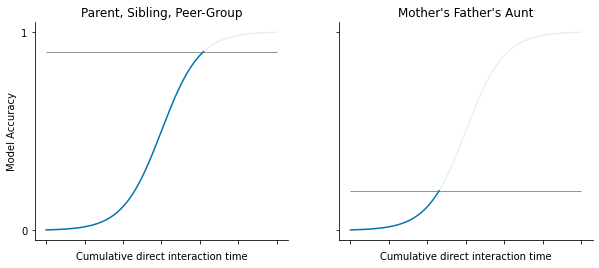

In [18]:
sns.set_palette(sns.color_palette('colorblind'))
current_palette = sns.color_palette()
direct = current_palette[0]
social = current_palette[8]
constraint = current_palette[7]

x = np.linspace(0, 12, 1001)
y = 1/(1+np.exp(-x+6))

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

idx = y < 0.9
ax[0].plot(x[idx], y[idx])
ax[0].plot(x[~idx], y[~idx], c=current_palette[0], alpha=0.1)
ax[0].hlines(0.9, x.min(), x.max(), lw=1, colors=constraint)
ax[0].set_title("Parent, Sibling, Peer-Group")
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels([])

idx = y < 0.2
ax[1].plot(x[idx], y[idx])
ax[1].plot(x[~idx], y[~idx], c=current_palette[0], alpha=0.1)
ax[1].hlines(0.2, x.min(), x.max(), lw=1, colors=constraint)
ax[1].set_title("Mother's Father's Aunt")

ax[0].set_xlabel("Cumulative direct interaction time")
ax[1].set_xlabel("Cumulative direct interaction time")
ax[0].set_ylabel("Model Accuracy")

sns.despine();
print()

With the computer scientist's cap on, the question becomes a familiar one: if it is time that binds, are there more efficient (sampling) algorithms? Nature and human experience answer in the affirmative: we gossip.^[Here is an example of where I’m taking some poetic license. [Dunbar talks about the relationship between grooming and trust formation quite explicitly](https://amzn.to/38feXc1). He even theorized how that could evolve into language (and was largely criticized for the claim). But the academic chain-of-evidence here obscures the point I’m trying to make. (Plus I haven’t read him in a decade.)] Talk is cheap in the sense that it is not expensive, not in the sense that it is valueless. It takes less time to gossip than to observe or participate in all the covered interactions. At the level of band or tribe (proximity-constrained and with kinship grammars to compress the inter-relationship space), we would reasonably expect to have mental models for both the gossiper and subject of gossip. Consequently, we can evaluate the gossipers claim; judge its veracity; then, update our expectations of both accordingly. Given the same time constraints, an allocation to gossip can boost model performance.


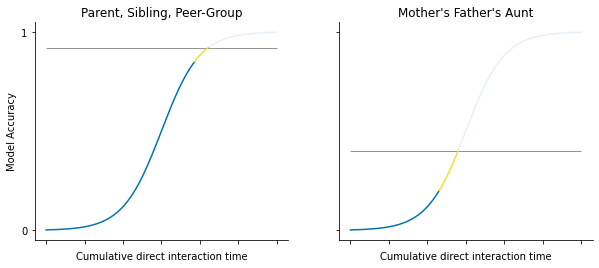

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

idx_a = y < 0.85
idx_b = (~idx_a) & (y < 0.92)
idx_c = y > 0.92
ax[0].plot(x[idx_a], y[idx_a])
ax[0].plot(x[idx_b], y[idx_b], c=social)
ax[0].plot(x[idx_c], y[idx_c], c=direct, alpha=0.1)
ax[0].hlines(0.92, x.min(), x.max(), lw=1, colors=constraint)
ax[0].set_title("Parent, Sibling, Peer-Group")
ax[0].set_yticks([0, 1])
ax[0].set_xticklabels([])

idx_a = y < 0.2
idx_b = (~idx_a) & (y < 0.4)
idx_c = y > 0.4
ax[1].plot(x[idx_a], y[idx_a])
ax[1].plot(x[idx_b], y[idx_b], c=social)
ax[1].plot(x[idx_c], y[idx_c], c=direct, alpha=0.1)
ax[1].hlines(0.4, x.min(), x.max(), lw=1, colors=constraint)
ax[1].set_title("Mother's Father's Aunt")

ax[0].set_xlabel("Cumulative direct interaction time")
ax[1].set_xlabel("Cumulative direct interaction time")
ax[0].set_ylabel("Model Accuracy")

sns.despine();
print()

Further boosting comes from the particular social topologies we readily forge -- in particular [cliques](https://en.wikipedia.org/wiki/Clique). Each member of a clique has semi-regular direct interactions with every other member, allowing them all to induce good models of mutual behavior. They also gossip about each other frequently. In this particular configuration, there is the happy coincidence of accessible good models for all the implicated parties for the purpose of evaluation and judgement. This makes deception both more difficult to achieve and more costly -- good models detect the attempted exploit and that detection may quickly propagate within the group of people the deceiver interacts with most. Thus, cliques are remarkably efficient in social and information-theoretic terms.^[If you haven’t read Robert Axelrod’s, [The Evolution of Cooperation](https://amzn.to/3b7kGT5), I strongly encourage you to do so. I’m admittedly biased (my dissertation cites his as foundational work), but it’s such an elegant and beautiful demonstration of things that are otherwise hard to reason about.] For the same amount of effort, you can produce *a greater number of high quality mental models*.

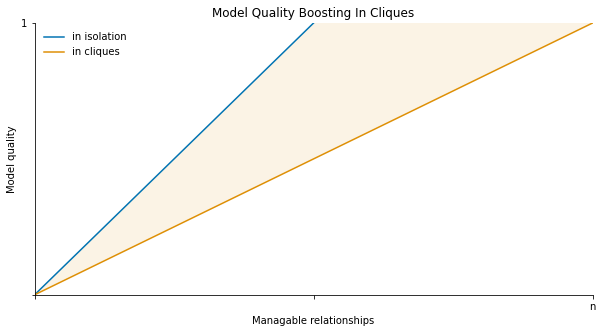

In [23]:
plt.subplots(1, 1, figsize=(10, 5))
x = np.linspace(0, 1, 101)
plt.plot(x, x, label="in isolation")
plt.plot(2*x, x, label="in cliques")
plt.xlabel("Managable relationships")
plt.ylabel("Model quality")
plt.xticks([0, 1, 2], ["", "", "n"])
plt.yticks([0, 1], ["", "1"])
plt.xlim(0, 2)
plt.ylim(0, 1)
plt.fill([(0, 0), (1, 1), (2, 1)], alpha=0.1)
plt.title("Model Quality Boosting In Cliques")
plt.legend(frameon=False)
sns.despine();


This trusted dense core -- along with progressively less dense ones that Dunbar did talk about -- allows us to deliberate over more far-flung spaces in our social neighborhood. The cost? Errors become correlated. Social expectations become the product of ensembles. At low-levels of socio-complexity, this isn't pathological. The errors are already implicitly conditioned on interaction frequencies and there is still considerable shared reality so, in some sense, the errors are structurally minimized. But, at higher-levels of socio-complexity, things fragment. Ensemble expectations become JIT category factories, and the consequent space of inter-relationship schemes explodes. Sometimes, calamitously.

## The Twitter-Scale Global Village

Armed with this conceptual framework, we can now shift our attention to social media. The environment is dramatically different. Time still binds there...but "there" is a different kind of there. Geographical coincidence no longer limits the set of potential relationships. People can transcend many of their traditional and local circumstances. This is, of course, the most celebrated aspects of social media — [one that I continue to delight in](https://twitter.com/generativist/status/1203544842531491840). But, it also moves us closer to the asymptotic, quadratic upper-bound of complexity for inter-relationships in ways we never have before.

To get a sense of our new scale, the following graph shows the empirical cumulative distribution functions for twitter friend and mutual relationships over a sample of 33,292 users.^[This is a weird and biased sample. I drew it using snowball sampling with both [Paul Graham](https://twitter.com/paulg) and [myself](https://twitter.com/generativist) as the seeds. *Except, frontier expansion followed all friend relationships in breadth-first order*. That is, it sampled all the people Paul Graham followed; then the people they followed. (And the same starting for me). At the time of writing, n=33,292.<br><br>Admittedly, [snowball sampling](https://en.wikipedia.org/wiki/Snowball_sampling) has some serious problems in most cases. In this one, it over-samples from the top-end of active users. If you took a much larger sample of friends and followers via the tweet sampling endpoints (which wouldn’t get you mutuals), you’ll see lower medians because it mixes casual and active users (and, without correction, retains those with no friends and followers). Since I believe the information environment for everyone will increasingly resemble the world the latter now lives in, I don't foresee any qualitative deviation from what I'm trying to broadly show here associated with my sampling method.<br><br>I have to look through twitter’s new restrictions on sharing for academic purposes. This is graph stuff (their moat), which they care about a bit more than just tweet IDs.<br><br>] Here, `friend` refers to someone the ego follows and `mutual` refers the the case where the person followed also follows the ego. The curious notch in the Friends CDF is [a social artifact of twitter's subscription rules](https://help.twitter.com/en/using-twitter/twitter-follow-limit) that allows a maximum of 5,000 friends under promiscuous-growth-limiting conditions. The shaded portion portrays 95% of the mass. The vertical line is the median.)

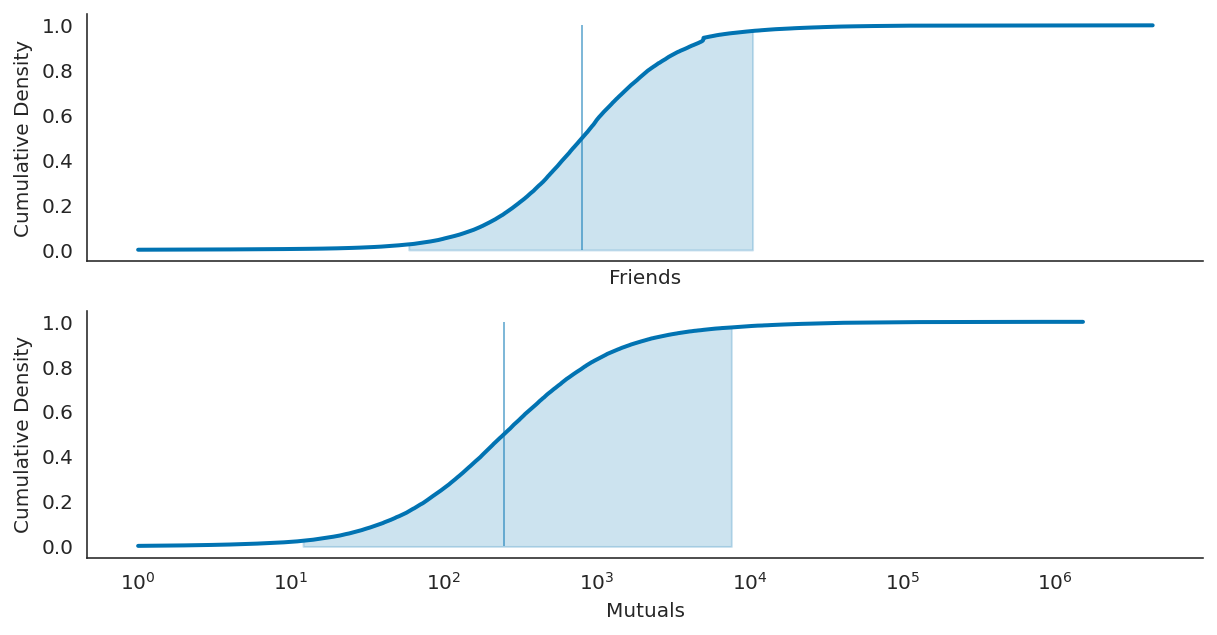

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

k_friends = np.array(df['k_friends'])
plot_cdf(k_friends, highlight=[2.5, 97.5], ax=ax[0], label="Friends", color=current_palette[0])
ax[0].set_xlabel("Friends")
ax[0].set_ylabel("Cumulative Density")

k_mutuals = np.array(df['k_mutuals'])
plot_cdf(k_mutuals, highlight=[2.5, 97.5], ax=ax[1], label="Mutuals", color=current_palette[0])
ax[1].set_xlabel("Mutuals")
ax[1].set_ylabel("Cumulative Density")

fig.set_facecolor('#00000000');

The median number of mutuals is 244 which is well within the plausible range for Dunbar's number. The median number of friends -- those we preferentially observe -- is 798. In both cases, the distributions are far from Gaussian. To a large degree, the beefy right tails are an environmental effect. Friends and follows don't decay from disuse on twitter as they would in a "real" (non-digitized representation) of a relationship. This inflates friend and mutual statistics in misleading ways, especially if algorithmic mediation winnows presentation, as it almost certainly does.^[I have no good means of testing it, but I’m pretty confident that people with high friend and mutual counts tend to rely on algorithmic curation, careful list hygiene, or alternative interfaces like [tweetdeck](https://tweetdeck.twitter.com/). You can test for the last case with the [source field of a tweet entities](https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet), but I haven’t done so.] But, the inescapable conclusion is that, without geographical confinement -- and, with a communication channel that approaches the lower-limit of legible expression -- we're no longer in the anthropologically tame world of bands and tribes.


Of course, there are familiar social regularities. Cliques continue to form as they always do. You don't need to fire up Jupyter notebook to see that. Even limited to avatars and [ambient intimacy](https://generativist.falsifiable.com/metaverse/ambient-intimacy-is-intimacy), we're remarkably good at detecting cliques. [It's a familiar twitter experience](https://twitter.com/generativist/status/1301279598093586433): this person belongs with that one and some others -- not in a stereotypical way, but in a who-sits-together-in-the-cafeteria one. We seek the strong force of social density.^[There’s a connection to the [efficient coding hypothesis](https://en.wikipedia.org/wiki/Efficient_coding_hypothesis) here that I keep trying to make unsuccessfully. Maybe you can find it though.] But, the rest of the interaction space has unfamiliar and sometimes uncanny sparsity. In my conception of Dunbar's number, I used $150^2 = 22500$ as the upper-bound alternative for people who exist in an environment where *fully-connected graphs* were plausible. (That is, everyone does indeed "know" everyone, in some not-entirely indirect way.) Social media is not that environment. As the following graph of friends-of-friends and mutuals-of-mutuals shows, it's much wilder.

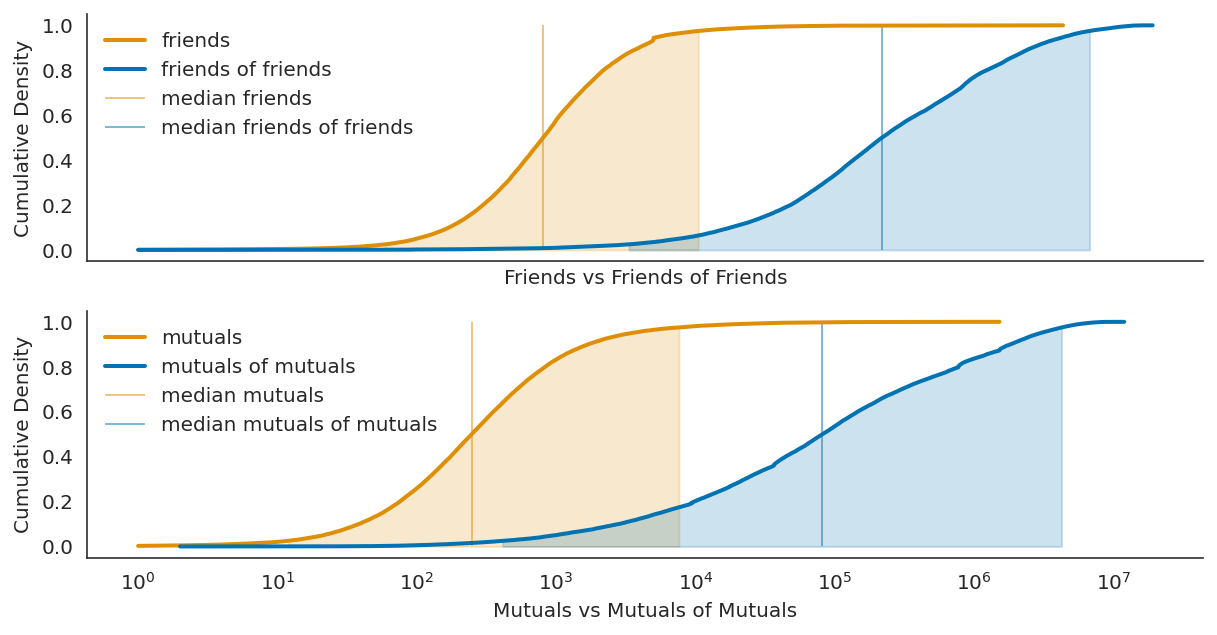

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(10, 5), sharex=True)

k_friends = np.array(df['k_friends'])
plot_cdf(k_friends, highlight=[2.5, 97.5], ax=ax[0], label="friends", color=current_palette[1])
ax[0].set_xlabel("Friends")
ax[0].set_ylabel("Cumulative Density")

k_fof = np.array(df['k_fof'])
plot_cdf(k_fof, highlight=[2.5, 97.5], ax=ax[0], label="friends of friends", color=current_palette[0])
ax[0].set_xlabel("Friends vs Friends of Friends")
ax[0].set_ylabel("Cumulative Density")
ax[0].legend(frameon=False)

k_mutuals = np.array(df['k_mutuals'])
plot_cdf(k_mutuals, highlight=[2.5, 97.5], ax=ax[1], label="mutuals", color=current_palette[1])
ax[1].set_xlabel("Mutuals")
ax[1].set_ylabel("Cumulative Density")

k_mom = np.array(df['k_mom'])
plot_cdf(k_mom, highlight=[2.5, 97.5], ax=ax[1], label="mutuals of mutuals", color=current_palette[0])
ax[1].set_xlabel("Mutuals vs Mutuals of Mutuals")
ax[1].set_ylabel("Cumulative Density")
ax[1].legend(frameon=False)

fig.set_facecolor('#00000000');

The median friends-of-friends and mutuals-of-mutuals are 209,043 and 66,787, respectively. These are big numbers (and **they are both gross UNDERESTIMATES given API limitations**).^[Snowball sampling along the frontier of friends in full breadth-first order has exponential growth. From each seed, you follow $\langle 𝑘 \rangle$ edges; then, for each sampled node, you follow $\langle 𝑘 \rangle$ more; then, for each of those, you follow $\langle 𝑘 \rangle$ more. Given the twitter's API limits, this makes friend-of-friend work...difficult. (Although, again, you could get just the friend distribution by collecting user entities.) At the time of writing, approximately 92% of relationships are missing from this analysis. Hence, I lump friends-of-friends (and mutuals-of-mutuals) together as "outside" when they would be much more interesting once partitioned.<br><br>The problem is fun to think about because this "missingness" statistic is related to the structure of the graph. For example, if you have a fully-connected component, then you may have 9 friends and they all have 9 friends but the entire population is 10 people, making sampling linear not quadratic at depth one. Twitter is not like that though -- it's much more sprawling. Until some unreachable (given API limits) point, the expanding frontier will always produce an outcome so that most of the friend-of-friend/mutual-of-mutual set is missing. There are better sampling methods and means of correction, but this sample wasn't even meant for this particular analysis, and the corrections aren't trivial.] Clearly, the frontier set of who you or someone you know might interact with in an observable way is huge. Of course, you could say the same thing about any “IRL” city. Just because they are accessible does not mean they are accessed. Except, they are — and with regularity. The following graph shows the proportion of interactions by relationships and interaction types. With the sample I have, it’s not possible (yet) to properly partition friends-of-friends (mutuals-of-mutuals) from outside of friends-of-friends (mutuals-of-mutuals). Consequently, “outside” here merely means not in the friend or mutual set.

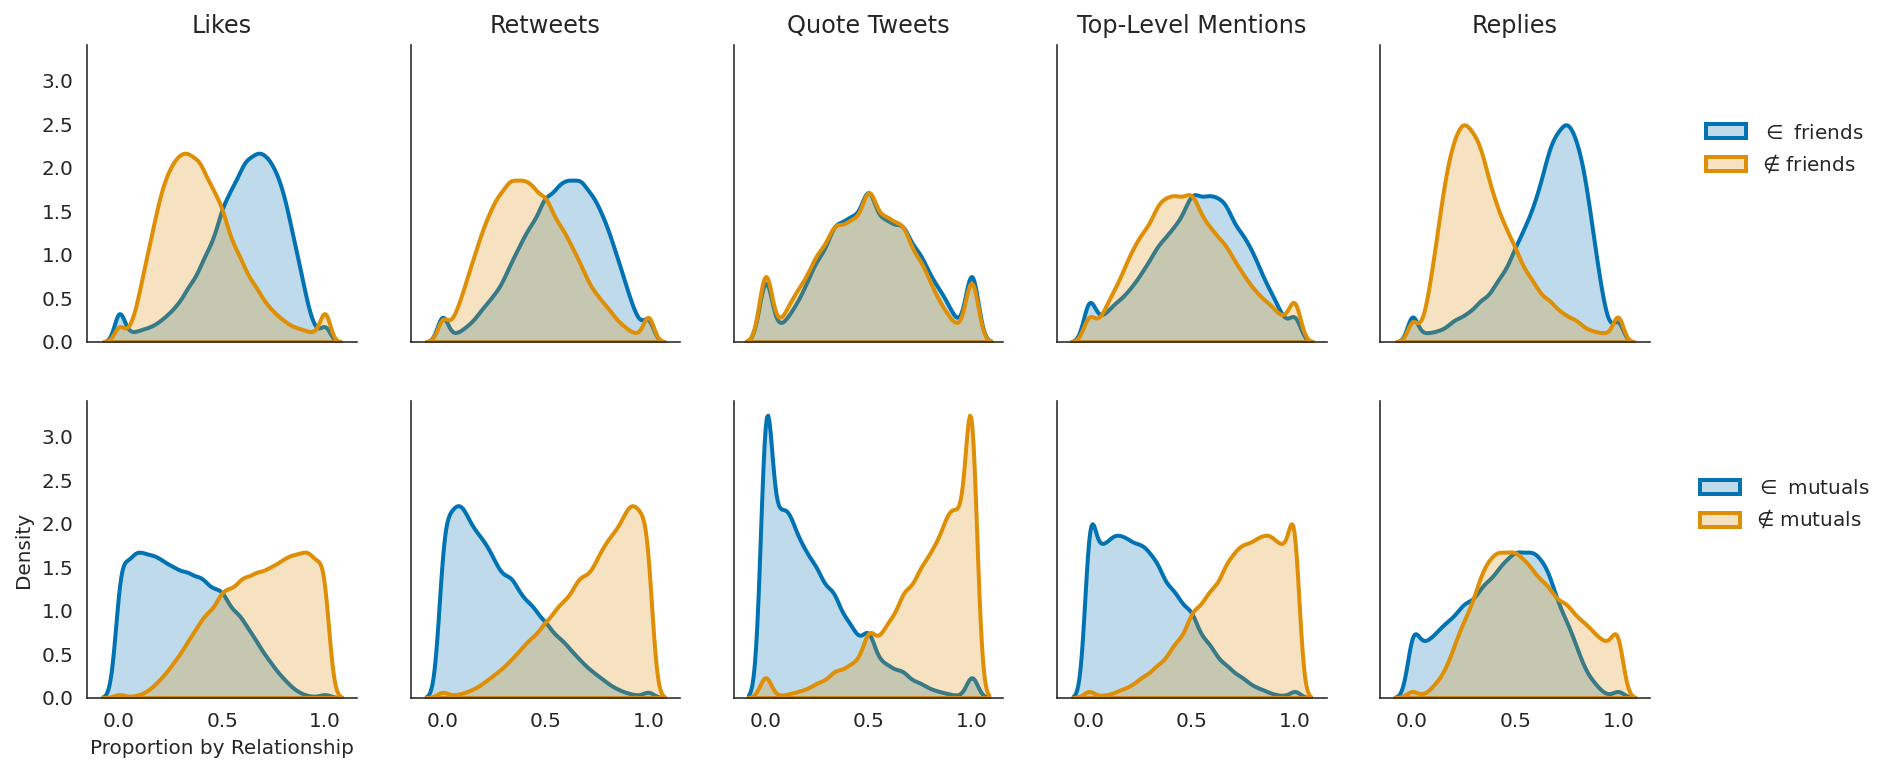

In [36]:
fig, axes = plt.subplots(2, 5, figsize=(14, 6), sharex=True, sharey=True)
sns.set_style('white')

μ_friends, μ_mutuals = df['k_friends'].median(), df['k_mutuals'].median()
fof_missing = (df['k_fof_missing'] / df['k_friends'])
mom_missing = (df['k_mom_missing'] / df['k_mutuals'])
p_fof_missing = fof_missing.mean()
p_mom_missing = mom_missing.mean()
μ_friends, μ_mutuals, μ_friends**2, μ_mutuals**2, p_fof_missing, p_mom_missing

stats_tbl = []

def plot_on(ax, kind, title, legend=False, labels=False, mutuals=False):
    idx = df[f'k_{kind}'] > 0
    sub_df = df[idx]
    total = sub_df[f'k_{kind}'][idx]
    total = total[idx]
    
    
    selector_a = 'friend'
    selector_b = 'fof'
    label_a = r'$\in$ friends'
    label_b = r'$\notin$ friends'
    if mutuals:
        selector_a = 'mutual'
        selector_b = 'mom'
        label_a = r'$\in$ mutuals'
        label_b = r'$\notin$ mutuals'
    
    inner = sub_df[f'k_{selector_a}_{kind}'] / total
    sns.kdeplot(inner, shade=True, label=label_a, ax=ax, lw=2)
    
    outer = (sub_df[f'k_{selector_b}_{kind}'] + sub_df[f'k_{selector_a}_distant_{kind}']) / total
    sns.kdeplot(outer, shade=True, label=label_b, ax=ax, lw=2)
    
    stats_tbl.append([kind, selector_a, inner.mean(), outer.mean()])
    
    
    if not legend:
        if ax.get_legend():
            ax.get_legend().remove()
    else:
        ax.legend(loc=8, bbox_to_anchor=(1.5, 0.5), ncol=1, frameon=0)
        
    if not labels:
        ax.set_ylabel(None)
    
    if mutuals:
        if labels:
            ax.set_xlabel('Proportion by Relationship')
    else:
        ax.set_title(title)
    sns.despine()
    
top_row = axes[0]
bottom_row = axes[1]
top_row[0].set_ylabel('Density')
bottom_row[0].set_ylabel('Density')

plot_on(top_row[0], 'likes', 'Likes')
plot_on(top_row[1], 'rts', 'Retweets')
plot_on(top_row[2], 'qts', 'Quote Tweets')
plot_on(top_row[3], 'tlm', 'Top-Level Mentions')
plot_on(top_row[4], 'urm', 'Replies', True)

plot_on(bottom_row[0], 'likes', 'Likes', mutuals=True, labels=True)
plot_on(bottom_row[1], 'rts', 'Retweets', mutuals=True)
plot_on(bottom_row[2], 'qts', 'Quote Tweets', mutuals=True)
plot_on(bottom_row[3], 'tlm', 'Top-Level Mentions', mutuals=True)
plot_on(bottom_row[4], 'urm', 'Replies', True, mutuals=True)
fig.set_facecolor('#00000000');

In [28]:
pd.DataFrame(stats_tbl, columns=['Interaction', 'Relationship', 'Inside Mean', 'Outside Mean']).set_index(['Relationship', 'Interaction'])

Inside Mean  Outside Mean
Relationship Interaction                           
friend       likes           0.599998      0.400002
             rts             0.571299      0.428701
             qts             0.510042      0.489958
             tlm             0.522403      0.477597
             urm             0.640315      0.359685
mutual       likes           0.319045      0.680955
             rts             0.274682      0.725318
             qts             0.229274      0.770726
             tlm             0.275983      0.724017
             urm             0.442760      0.557240

Unsurprisingly, most interactions take place between friends (i.e. people the ego follows) and around a third of interactions take place between mutuals. But, an impressive amount takes place outside these relationships. Your friends and mutuals do not form anything like a blanket for interactions you only occasionally escape. *And, rightfully so -- ambient discovery couldn't work so wonderfully well if they did!* However, this also presents a critical problem. There is no way to accrete sufficient interactions and observations with something on the order of 60,000 people (in the dramatic underestimate). Even if you could, cognition really does bind here.

But, it's worse than that because the latent space we're intrinsically trying to navigate is the quadratic inter-relational one. In search of lacking and needed structure, our remarkable pattern-matching machinery gets to work manufacturing cues from scant material. To some degree, that's what culture affords. On twitter, it means we create meaning from things like "pronouns in bio" or a 🇺🇸 in a display name or the hashtags in someone's tweets or even the vocabulary they use. These cues provide a means to aggregate experiences, transcending experiential sparsity in a way that affords stable expectations. Thus, when we're confronted with contexts that have limited, ambiguous, noisy, and error-prone available information -- something that happens with high frequency on twitter -- cues offer a strong and readily available signal for integration. Absent the necessarily experience, the resulting mixture allow us to construct "good" models in a better-than-chance predictive sense.

***Unfortunately, the social cues end up dominating the accessible information.*** You find yourself updating expectations in response to synthesized experience over what is often not much more than noise. (You notice this most on the knife's edge -- "I think I like this post but let me first check the profile description and a few other tweets to make sure.") The trouble is that the resulting judgment back-propagates over both our social and asocial beliefs (i.e. knowledge or something like it). Concurrently, by something like [Hebbian logic](https://en.wikipedia.org/wiki/Hebbian_theory), these ensemble-manufactured social cues end up wiring your interaction networks -- providing the missing relational structure through something like a self-fulfilling social prophecy. Thus, the chronically-correlated errors have much more pathological effects. Social beliefs leak far too much information into our (presumptively) asocial ones.

## Tomorrowland


Recapitulating, what binds us now isn't that we can suddenly connect to $n$ people, where $n$ continues to approach the full population of the world. What binds is our ability to navigate the quadratic inter-relational space. We may aspire to treat other people as individuals but, in practice, what we get is a proliferation of categories with attached expectations that condition perception and behavior. This begs the big question: ***do we have sufficient means of grounding to resist the decoherence of beliefs and the reification of cues induced by these entropic contexts***? Or, do they occur with such pinned frequency that we can't recover -- such that the errors can't correct, and instead they invade and degrade surrounding knowledge?

I don't know.

It's an unanswered question. More than that, I think it's an analytically intractable one. Not only is social media a remarkably complex system in its own right, but it's not an isolated one and the world is fantastically large and messy. [Personally, I'm irrevocably optimistic](https://twitter.com/generativist/status/1203544842531491840). History repeatedly documents the death knells that never came. Writing destroys the mind! Books destroy the mind! Radio destroys the mind! TV destroys the mind! The world wide web destroys the mind! Social media destroys the mind! Except they didn't and probably don't. What new mediums do destroy is the primacy of older ones.

Along the same lines, there is nothing magically natural about the social configurations of bands and tribes. Mostly, they ofter us hints as to evolutionary pressures inherent in our species' once-upon-a-time cradle. The same applies to the world as we imagine it was before social media -- it isn't privileged. Homo sapiens sapiens is nothing if not adaptive. We shape our environment; our environment shapes us, over and over again, recursively and with no end. This is more of that. What we're building / growing / evolving now will change the ways in which we relate to one another. They already have; they still have to. The architecture is fundamentally different: what we individually and collectively can perceive and achieve will be, too. It need not be harmful and it is not unnatural--it's just next.

None of this is to say we're there yet…wherever there is. Criticism remains, as always, important -- it's one of the basic corrective mechanisms we have to flop about the space of shared possibilities somewhat reasonably. It isn't merely valid -- it's utterly necessary. There were, are, and will continue to be problems, many of them serious. We don't yet know which structures are reliably bad and generate robust harm. However, we can recognize that current designs still fail to implement the sensing tools we need to perceive and the actuators we need to act in the new socio-cultural space. They mix dyadic relationships and experiences with social and cultural ones in ways that durably frustrate our cognition. More than that, limited APIs aside, we're mostly subjects of centrally-managed architectures that frustrate design innovation and evolution. We're governed by entities trying govern an intractable space at speeds that can't even keep up with last year's 0-days. The opportunities for and inherent to a new ecosystem are profound.

But, I think everyone (myself included) needs to spend sufficient time zoomed out far enough to see the full field. Already, we spend time online to entertain ourselves, to seek validation, to mitigate social isolation, to learn, to discover opportunities, to transact, and to deliberate. There isn't one mode. It's not one thing. It's not an isolated or meaningless playground, as some of the most confused critics claim. It's closer to a new kind of metropolis or nation.

Or what eventually competes with them…

…past human performances are no guarantee of future realizations.

---

After finishing a Ph.D. investigating belief system expression and discovery through simulation, I started working on a social immune system for twitter leveraging their API. Eventually, I realized that trying to build an elaborate sandcastle on someone else’s private beach isn’t the smartest of plays. Now, I’m building something else. If you are in this space — and especially if you foster romantic notions about the power and promise of decentralizing computer-mediated communication — please reach out. I want to hear from you.

Thanks to my wife and [Danny Horowitz](https://twitter.com/DannyHorowitz) for reviewing drafts.

This post was [originally published on Substack](https://generativist.substack.com/p/dunbars-number-is-quadratic).

---